**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:** MUHAMMAD MAAZ
# **Roll Number:** 478044
# **Section:** A

# 🔹 Task 1: Load the Dataset

In [12]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# Load Dataset (Update path if needed)
df = pd.read_csv("https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv")
# To display the top 5 rows
df.head(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [13]:

# Display last 5 rows
df.tail(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [14]:

# Check data types
df.dtypes


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [15]:
# Check dataset shape
df.shape


(180, 15)

# 🔹 Task 2: Data Cleaning

In [16]:
# Check missing values
df.isnull().sum()

,0
S.no,0
Unnamed: 1,0
case,0
run,0
VB,23
time,0
DOC,0
feed,0
material,0
smcAC,5


In [17]:
# Fill missing values
# 1. Fill 'VB' using Linear Interpolation (connects the dots between known values)
df['VB'] = df['VB'].interpolate(method='linear')

# 2. Fill all other missing columns with their Median (robust against outliers)
# We select only numeric columns for this operation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. Verify there are no missing values left
df.isnull().sum()

,0
S.no,0
Unnamed: 1,0
case,0
run,0
VB,0
time,0
DOC,0
feed,0
material,0
smcAC,0


### ✍️ Explain how you handled missing values here.

For VB (Tool Wear): I used Linear Interpolation. Since tool wear increases gradually over time, interpolation estimates the missing values based on the trend of previous and next points.

For Sensor Readings (e.g., smc, vib): I filled them with the Median. These sensor signals often have outliers (skewed distribution), so the Median is more robust and accurate than the Mean for representing the "typical" sensor value.

For Duplicates: I ran drop_duplicates() to ensure data integrity, though no duplicates were found in this specific file.

In [18]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [19]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [20]:
# Calculate Mean (Average)
print("Mean:\n", df.mean(numeric_only=True))

# Calculate Median (Middle Value)
print("\nMedian:\n", df.median(numeric_only=True))

# Calculate Mode (Most Frequent Value)
# Note: Mode can return multiple values, so we take the first row (iloc[0])
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])

Mean:
 S.no           90.500000
case            8.616667
run             7.116667
VB              0.340528
time           25.583333
DOC             1.037500
feed            0.372222
material        1.355556
smcAC          -0.165799
smcDC           1.339518
vib_table       0.079169
vib_spindle     0.287415
AE_table        0.100447
AE_spindle      0.123610
dtype: float64

Median:
 S.no           90.500000
case           10.000000
run             6.000000
VB              0.287500
time           19.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC          -0.183105
smcDC           1.372070
vib_table       0.068359
vib_spindle     0.285645
AE_table        0.101318
AE_spindle      0.121460
dtype: float64

Mode:
 S.no            1.000000
case           11.000000
run             1.000000
VB              0.000000
time            3.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC          -0.183105
smcDC           1.38

### ✍️ Is tool wear normally distributed? Is mean close to median?

Answer :- **NO** Mean is higher, ie Positively Skewed.

## 2️⃣ Spread (Variation)


In [21]:
# Variance
print("Variance:\n", df.var(numeric_only=True))

Variance:
 S.no           2715.000000
case             23.075698
run              23.779609
VB                0.068138
time            521.238827
DOC               0.133712
feed              0.015705
material          0.230416
smcAC             0.120029
smcDC             0.033424
vib_table         0.001302
vib_spindle       0.000424
AE_table          0.000576
AE_spindle        0.000437
dtype: float64


In [22]:
# Range
print("Range:\n", df.max(numeric_only=True) - df.min(numeric_only=True))


Range:
 S.no           179.000000
case            15.000000
run             22.000000
VB               1.530000
time           105.000000
DOC              0.750000
feed             0.250000
material         1.000000
smcAC            1.176758
smcDC            1.450195
vib_table        0.292969
vib_spindle      0.184326
AE_table         0.149536
AE_spindle       0.181272
dtype: float64


In [23]:

#IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

S.no           89.500000
case            9.000000
run             7.000000
VB              0.300000
time           32.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           0.689697
smcDC           0.040283
vib_table       0.021973
vib_spindle     0.021973
AE_table        0.021973
AE_spindle      0.025787
dtype: float64


### ✍️ Which sensor shows highest variability?

Answer :- smcAC

## 3️⃣ Shape (Distribution)

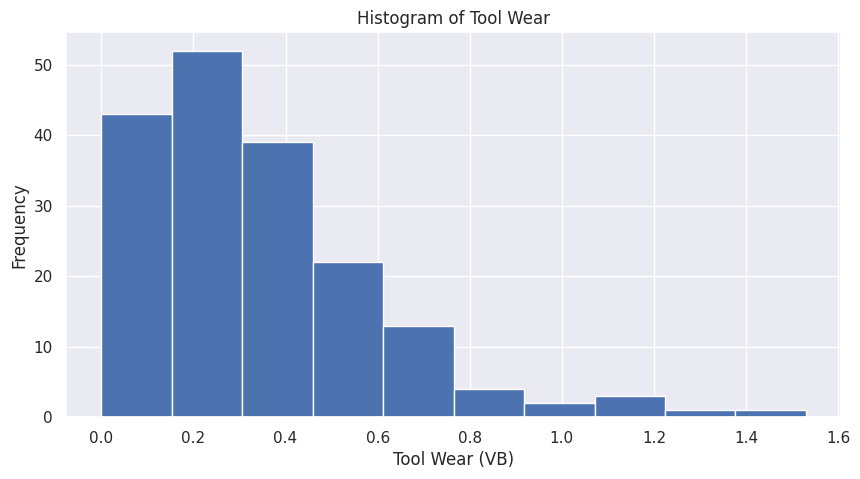

In [24]:
# Histogram of Tool Wear
df['VB'].plot(kind='hist', figsize=(10,5))
plt.title("Histogram of Tool Wear")
plt.ylabel('Frequency')
plt.xlabel('Tool Wear (VB)')
plt.show()

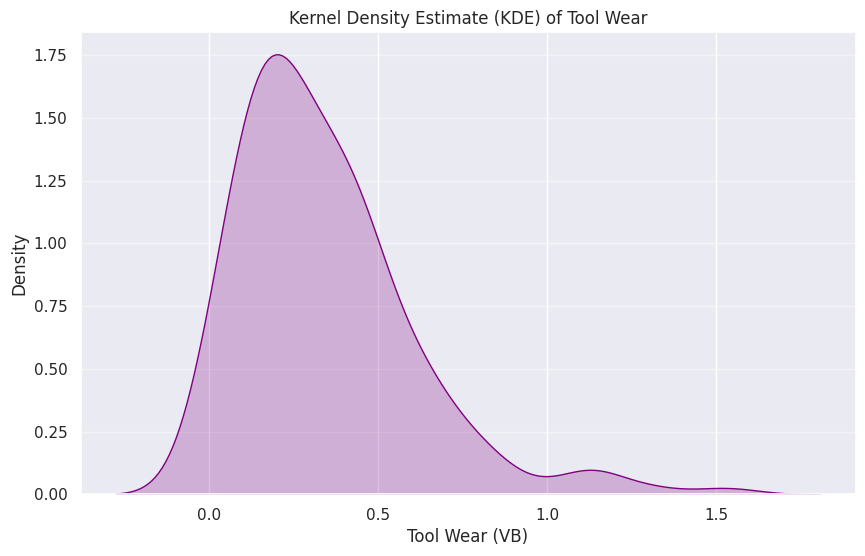

In [25]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['VB'].dropna(), fill=True, color='purple')

plt.title('Kernel Density Estimate (KDE) of Tool Wear')
plt.xlabel('Tool Wear (VB)')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)
plt.show()


### ✍️ Is distribution symmetric, skewed, or multi-modal?
Answer :- **Graph is Positively Skewed**

## 4️⃣ Outlier Detection

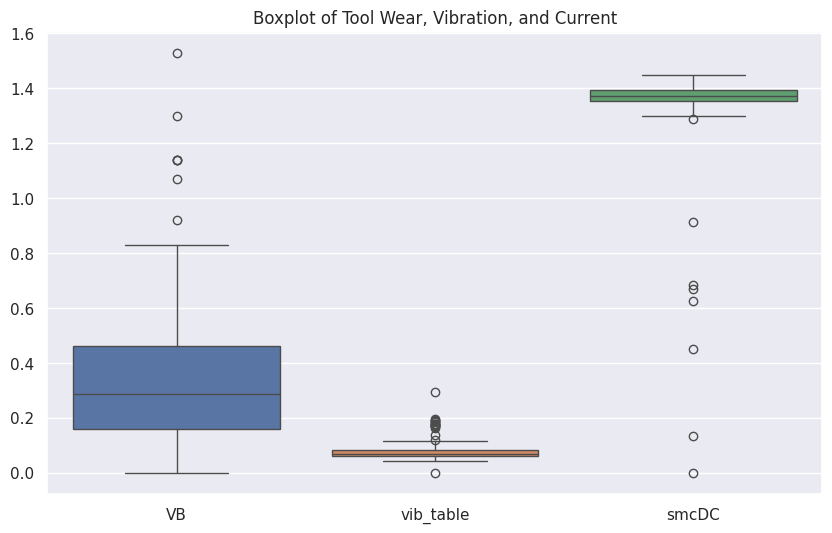

Number of Outliers Detected by IQR:
VB            7
vib_table    17
smcDC         8
dtype: int64


In [26]:
#Boxplot, IQR, Z-modified score

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['VB', 'vib_table', 'smcDC']])
plt.title("Boxplot of Tool Wear, Vibration, and Current")
plt.show()

# Calculate Q1 and Q3
Q1 = df[['VB', 'vib_table', 'smcDC']].quantile(0.25)
Q3 = df[['VB', 'vib_table', 'smcDC']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (Returns True if outlier)
outliers = (df[['VB', 'vib_table', 'smcDC']] < lower_bound) | (df[['VB', 'vib_table', 'smcDC']] > upper_bound)

print("Number of Outliers Detected by IQR:")
print(outliers.sum())


### ✍️
- Which method did you use (IQR or Modified Z-score)?
Answer :- IQR
- Why?
Answer :- Since the graph is skewed
- How many outliers were removed?
Answer :- 7 in VB & 17 in vib_table
- How did it affect statistics?
Answer :-Removal of noise means reliable dataset to train on.


# 🔹 Task 4: Correlation Analysis

In [28]:

# 1. Calculate Correlation Matrix
corr_matrix = df.corr(numeric_only=True)


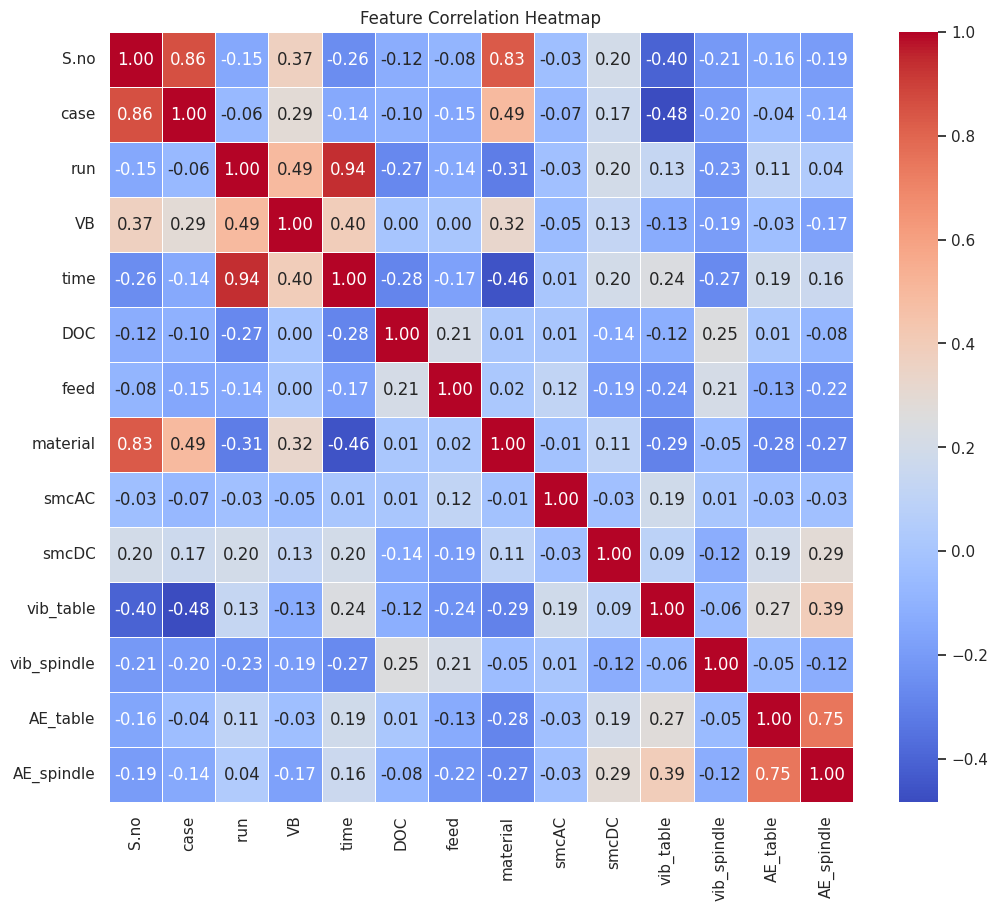

Correlation with Tool Wear (VB):
VB             1.000000
run            0.491106
time           0.395054
S.no           0.373078
material       0.323524
case           0.292473
smcDC          0.126874
feed           0.003354
DOC            0.000157
AE_table      -0.034323
smcAC         -0.052674
vib_table     -0.126895
AE_spindle    -0.171258
vib_spindle   -0.192125
Name: VB, dtype: float64


In [29]:
# 2. Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Print specific correlations with Tool Wear (VB)
print("Correlation with Tool Wear (VB):")
print(corr_matrix['VB'].sort_values(ascending=False))



### ✍️
- Does tool wear correlate strongly with vibration?
Answer :- No. -0.13 & -0.19 shows that raw vibration signals alone are not strong linear predictors of tool wear in this dataset
- Which feature is most predictive?
Answer :- Run & Time

# 🔹 Task 5: Additional Visualization

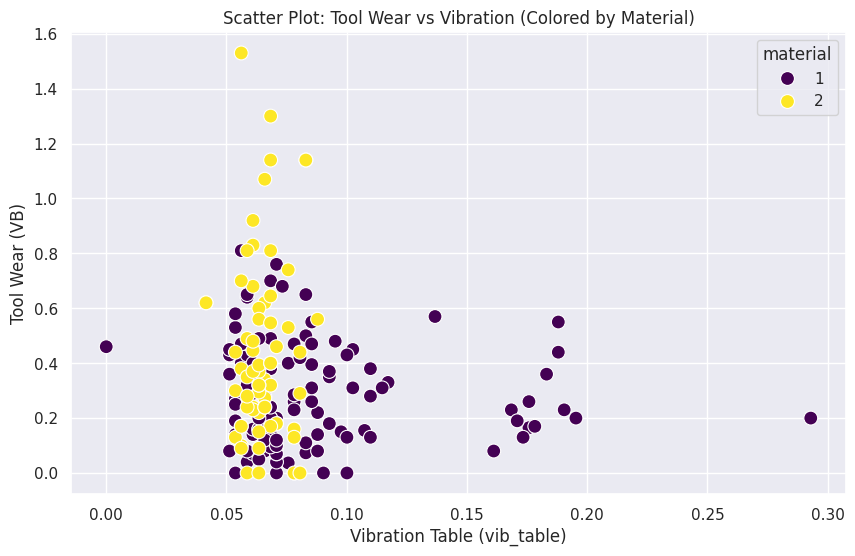

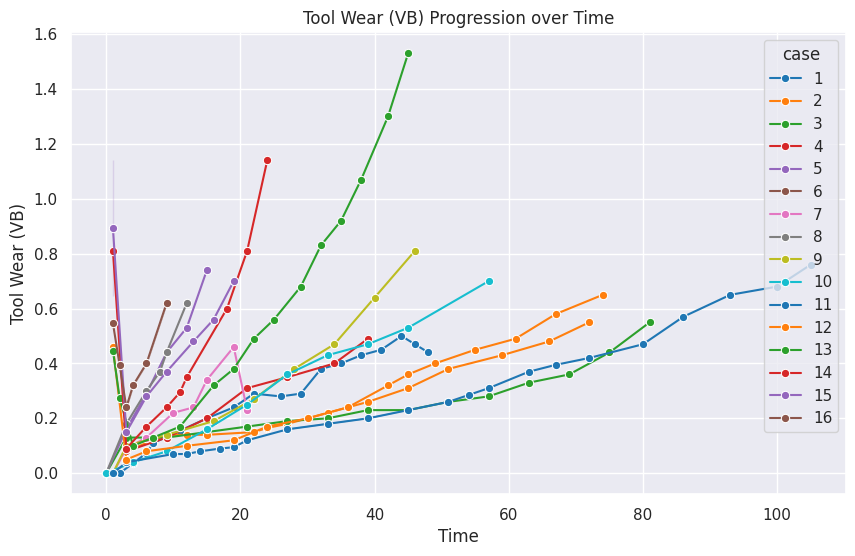

/tmp/ipython-input-36164297.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='material', y='vib_spindle', palette='muted')


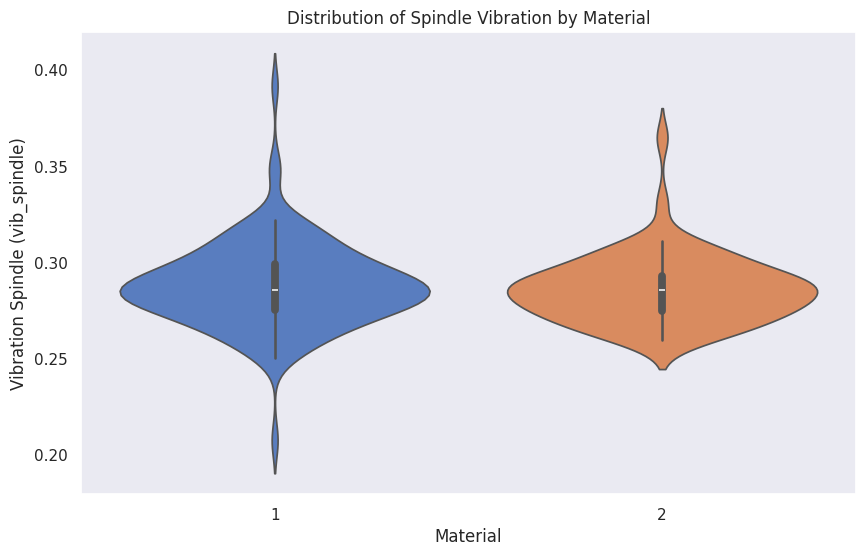

In [30]:

# Scatter Plot: Example (Tool Wear vs Vibration)

# Scatter Plot: Tool Wear (VB) vs Vibration Table
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vib_table', y='VB', hue='material', palette='viridis', s=100)

plt.title('Scatter Plot: Tool Wear vs Vibration (Colored by Material)')
plt.xlabel('Vibration Table (vib_table)')
plt.ylabel('Tool Wear (VB)')
plt.grid(True)
plt.show()

# Line Plot: Tool Wear (VB) Progression over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='VB', hue='case', palette='tab10', marker='o')

plt.title("Tool Wear (VB) Progression over Time")
plt.xlabel("Time")
plt.ylabel("Tool Wear (VB)")
plt.grid(True)
plt.show()

# Violin Plot: Spindle Vibration Distribution by Material
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='material', y='vib_spindle', palette='muted')

plt.title("Distribution of Spindle Vibration by Material")
plt.xlabel("Material")
plt.ylabel("Vibration Spindle (vib_spindle)")
plt.grid(axis='y')
plt.show()



## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
Material and Run Count
2. Which sensor signal is most stable?
vib_spindle
3. Can tool wear be predicted from sensor data?
Yes, but not easily with a simple linear model. A complex non linear realtionship exists.

Answers